# Adversial Noise Challenge Demo Notebook

In [2]:
# Import necessary libraries
import sys
import os
import matplotlib.pyplot as plt 

# Add the project root to sys.path (to import adversarial_attack_lib)
sys.path.append(os.path.abspath(os.path.join(os.path.dirname("__file__"), "..")))

# Import the adversarial attack library
from adversarial_attack_lib.runner import run_attack

# Import the function to download example images for testing
from scripts.download_example_images import download_selected_images

## 1) Download some Example ImageNet Class Images

In [3]:
# Download some example images for testing (hardcoded for simplicity for example purposes)
download_selected_images(save_dir="original_images")

✅ goldfish.JPEG already exists.
✅ dog.JPEG already exists.
✅ cat.JPEG already exists.
✅ monkey.JPEG already exists.


## 2) Run Example using Fast Gradient Sign Method

In [6]:
image_path = "original_images/monkey.JPEG"  # Example image path
target_class = "goldfish"
attack_type = "fgsm"                        # Fast Gradient Sign Method
epsilon = 0.1                               # Perturbation magnitude
model_name = "resnet18"                     # Example model name
save_output = True                          # Whether to save the output image
save_dir="FGSM_Results"                     # Directory to save the output image

# Main runner function to generate adversarial image to be misclassified as target class
result = run_attack(
    image_path=image_path,
    target_class=target_class,
    attack_type=attack_type,
    epsilon=epsilon,
    model_name=model_name, 
    save_output=True,
    save_dir=save_dir
)

Original confidence for 'goldfish': 0.0000
Adversarial confidence for 'goldfish': 0.0001
Saving images to 'FGSM_Results/'
Saved images to 'FGSM_Results/'


Original confidence for 'goldfish': 0.0000
Adversarial confidence for 'goldfish': 0.9994
Saving images to 'PGD_Results/'
Saved images to 'PGD_Results/'


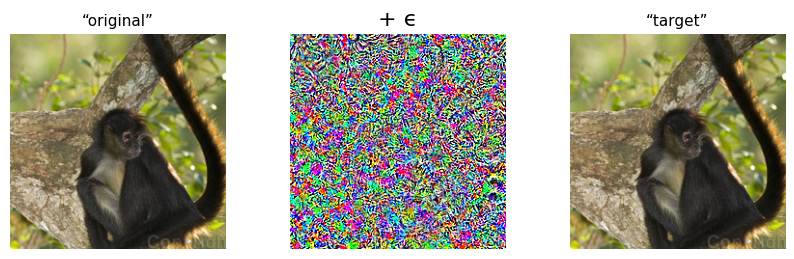

In [15]:
image_path = "original_images/monkey.JPEG"  # Example image path
target_class = "goldfish"
attack_type = "pgd"                         # Projected Gradient Descent Method
epsilon = 0.03                              # Perturbation magnitude
alpha = 0.005                               # Step size for iterative attacks
steps = 10                                  # Number of steps for iterative attacks
model_name = "resnet18"                     # Example model name
save_output = True                          # Whether to save the output image
save_dir="PGD_Results"                      # Directory to save the output image

# Main runner function to generate adversarial image to be misclassified as target class
result = run_attack(
    image_path=image_path,
    target_class=target_class,
    attack_type=attack_type,
    epsilon=epsilon,
    alpha=alpha,
    steps=steps,
    model_name=model_name, 
    save_output=True,
    save_dir=save_dir
)

visualize_attack_result_stylized(result)

In [ ]:
import matplotlib.pyplot as plt
import torch


def visualize_attack_result_stylized(result, original_label="original", adv_label="target"):
    """
    Styled visualization of adversarial attack showing:
    - Original image with label + confidence
    - Perturbation noise
    - Adversarial image with label + confidence

    Args:
        result (dict): Output from run_attack(). Must contain:
            - 'original_tensor': original image (1 x C x H x W)
            - 'adversarial_tensor': adversarial image (1 x C x H x W)
            - 'target_class': name of target class (string)
            - 'adv_confidence': float
            - 'orig_confidence': float (optional)
            - 'orig_class': name of original class (optional)
    """
    orig = result["original_tensor"].cpu().squeeze()
    adv = result["adversarial_tensor"].cpu().squeeze()
    noise = (adv - orig)

    # Denormalize
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    def denorm(img): return torch.clamp(img * std + mean, 0, 1)
    orig_img = denorm(orig).permute(1, 2, 0).numpy()
    adv_img = denorm(adv).permute(1, 2, 0).numpy()
    noise_img = (noise / (2 * noise.abs().max()) + 0.5).permute(1, 2, 0).numpy()

    # Text Labels
    orig_class = result.get("orig_class", original_label)
    target_class = result.get("target_class", adv_label)
    orig_conf = result.get("original_confidence", None)
    adv_conf = result.get("adversarial_confidence", None)

    orig_title = f'“{orig_class}”\n{orig_conf*100:.1f}% confidence' if orig_conf is not None else f'“{orig_class}”'
    adv_title = f'“{target_class}”\n{adv_conf*100:.1f}% confidence' if adv_conf is not None else f'“{target_class}”'

    # Plot
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))

    axes[0].imshow(orig_img)
    axes[0].axis('off')
    axes[0].set_title(orig_title, fontsize=11)

    axes[1].imshow(noise_img)
    axes[1].axis('off')
    axes[1].set_title(r"+ ϵ", fontsize=16)

    axes[2].imshow(adv_img)
    axes[2].axis('off')
    axes[2].set_title(adv_title, fontsize=11)

    # Equal spacing
    plt.subplots_adjust(wspace=0.3)
    plt.show()


In [11]:
result

{'original_confidence': 1.8191324267530663e-15,
 'adversarial_confidence': 0.9985131621360779,
 'original_tensor': tensor([[[[ 0.5707,  0.5878,  0.6049,  ..., -0.8164, -0.8507, -0.8849],
           [ 0.5878,  0.5878,  0.5878,  ..., -0.7822, -0.8335, -0.8849],
           [ 0.5878,  0.5878,  0.5707,  ..., -0.7308, -0.7822, -0.8335],
           ...,
           [ 1.4440,  1.3584,  1.3584,  ..., -0.1143,  0.3652,  0.3994],
           [ 2.0605,  1.6838,  1.6153,  ..., -0.0629,  0.2624,  0.3138],
           [ 2.1975,  2.0605,  1.8379,  ..., -0.0801, -0.0629, -0.0116]],
 
          [[ 0.8354,  0.8529,  0.8704,  ..., -0.5826, -0.6176, -0.6527],
           [ 0.8529,  0.8529,  0.8880,  ..., -0.5476, -0.6001, -0.6527],
           [ 0.8529,  0.8529,  0.8704,  ..., -0.5126, -0.5651, -0.6176],
           ...,
           [ 1.5882,  1.6583,  1.6933,  ..., -0.0224,  0.4503,  0.4853],
           [ 2.2185,  1.9734,  1.8859,  ...,  0.0301,  0.3452,  0.4153],
           [ 2.3936,  2.2710,  2.0959,  ...,  0.